In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Dataset\\Ads_CTR_Optimisation.csv")

In [3]:
dataset.head(3)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0


About Dataset :<br>
Here a product advertisment is prepared in different scenarios and then we see which ad is most liked by the customers.<br>
The user prepares many ads but is not sure about which one to put on the social site(i.e. the ad that will get maximum click). <br>

So we have `10 versions` of the same ad trying to sell a product. Each time user will login to his account, we will place `one` version of this `ten` ads and that will be `one round` and we will observe its response. If the user `clicks on the ad` we will get `reward` as `1` and if user `doesn't click on the ad` we get `reward` as `0`. Here in above dataset there are 10000 such users. <br>

However we are not going to show different version of the ad to each user at `random`.There will be a specific stratergy to do this. The stratergy will depend in each round on the previous result we observed at the previous rounds. <br><br>
For example, at `round 10` the algorithm will look at different results observed at the first 10 rounds and according to these results it will decide which version of the ad it will show to the user. The stratergy is dynamic because it depends on the observation from beginning of the experiment upto the present time. 

# Random Selection

In [4]:
# Implementing Random Selection
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward
print('Total Reward = ',total_reward)
print("First twenty selected ads = ",ads_selected[:20])

Total Reward =  1243
First twenty selected ads =  [8, 3, 0, 5, 6, 7, 2, 7, 3, 6, 0, 0, 3, 7, 3, 9, 2, 7, 5, 9]


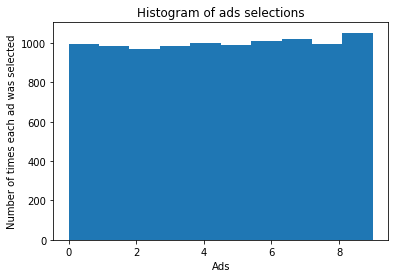

In [5]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

We are selecting at random one version of the ad at each round. Random selection algorithm selected a ad at each round 

# Implementing UCB

In [6]:
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d #No of times ad i was selected upto round n,
                                #Create a vector that will contain each of those numbers of selections
                                #[0]*d creates a vector of size d containing 0
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):             #Stratergy will applied after 10 first round
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400    #
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound#Keeping the value of highest upper bound
            ad = i                       # Keeping track of that specific ad
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

At round 11 number of selection will be 1.<br>
We also need few ad data to work upon so we will take first ten data.

when n =0 i.e. for the first round we will go 10(iteration on i) versions of the ad.<br>
`If` no ads were selected in the first round so the condition `if (numbers_of_selections[i] > 0):` will never be true and therefore we will directly go to else loop and accordingly upper bound will be set equal to $10^{400}$ . Then we move to the next `if upper_bound > max_upper_bound:` So if this codition is true then we see that upper bound is greater than max_upperbound(i.e. in first case it is 0), so max_upperbound will be equal to upper_bound.<br>
Let for the second time ad is still not selected so so again we will come to else part.upper_bound = $10^{400}$ and after getting into comparison `if upper_bound > max_upper_bound:` we get a comparison $10^{400}$ > $10^{400}$ which is `false` so ad remains set to 0. 

In [7]:
print("Total Reward = ",total_reward)

Total Reward =  2178


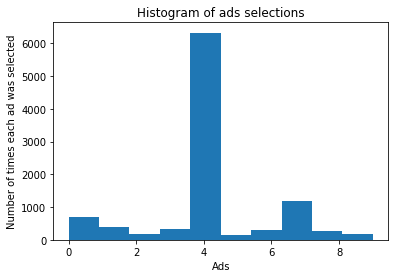

In [8]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()